In [0]:
%reset -f

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
# https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import time

print(tf.__version__)

1.13.1


In [0]:
import os
import numpy as np
npzfile=np.load('/content/gdrive/My Drive/python-cloud/rawtrainfile.npz')
npzfile.files

images=npzfile['arr_0']
labels=npzfile['arr_1']




In [0]:
npimages=np.array(images)
nplabels=np.array(labels)
print('images shape: {} \n labels shape: {}'.format(npimages.shape, nplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(npimages[0].shape, nplabels[0:10]))


images shape: (39209,) 
 labels shape: (39209,)
first image shape: (30, 29, 3) 
 first eleven label shape: [0 0 0 0 0 0 0 0 0 0]


In [0]:
from skimage.transform import resize

images48 = [resize(image, (48, 48)) for image in npimages]
print(type(images48))


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<class 'list'>


In [0]:
images48 = np.array(images48)
print('total number of images and size {}'.format(images48.shape))
print(images48[0].shape)

total number of images and size (39209, 48, 48, 3)
(48, 48, 3)


In [0]:
import keras
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling2D, CuDNNGRU, CuDNNLSTM, Reshape
from keras.layers import Dropout, Dense, Activation, Flatten,Conv2D,  BatchNormalization
from keras.models import Sequential
from keras.layers import LSTM  


model = Sequential()
model.add(Conv2D(1, kernel_size=(1, 1),padding='valid', strides=1, activation='relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(29, 5, padding='valid', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,  padding='valid',strides=2))
model.add(Dropout(0.1))                 
model.add(Conv2D(59, 3,  padding='valid',strides=1, activation='relu')) # increase kernel size to 5
model.add(BatchNormalization())
model.add(MaxPooling2D(3,strides=2,  padding='valid'))
model.add(Dropout(0.1))
model.add(Conv2D(74, 3, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,strides=2,  padding='valid')) 
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Dropout(0.5))
model.add(Reshape((15, 15)))
model.add(GRU(86, dropout=0.1, recurrent_dropout=0.5))

model.add(Dense(43, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 1)         4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 29)        754       
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 29)        116       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 29)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 29)        0         
___________________________

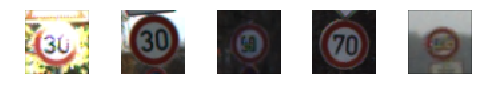

In [0]:
## Training plot

import matplotlib.pyplot as plt

traffic_signs = [250, 2120, 3400, 6500,9000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(images48[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [0]:

X_train=images48.astype('float32')

print(X_train.shape)

#nplabels=np.array(labels)
print("First label is %s and Total labels shape are %s" %(nplabels[0], nplabels.shape))


Y = keras.utils.to_categorical(nplabels,43)

print("after one hot coding Labels shape is:",Y.shape)
print("First Label after one hot coding:",Y[0])

(39209, 48, 48, 3)
First label is 0 and Total labels shape are (39209,)
after one hot coding Labels shape is: (39209, 43)
First Label after one hot coding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
import pandas as pd
import os
import numpy as np
npzfilet=np.load('/content/gdrive/My Drive/python-cloud/rawtestfile.npz')
npzfilet.files

X_test=npzfilet['arr_0']
y_test=npzfilet['arr_1']



test_images = np.array(X_test)
test_labels = np.array(y_test)


In [0]:
test_images.shape

(12630,)

In [0]:
from skimage import transform
from skimage.color import rgb2gray

test_imagesnp=np.array(test_images)
    

# Transform the images to 28 by 28 pixels
test_images48 = [transform.resize(image, (48, 48)) for image in test_imagesnp]



/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


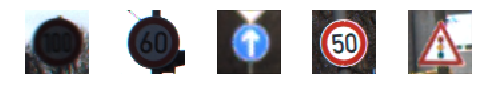

In [0]:
import matplotlib.pyplot as plt

testsigns = [150, 700, 1100, 1500,5000]

for i in range(len(testsigns)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(test_images48[testsigns[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [0]:
tnpimages=np.array(test_images48)
tnplabels=np.array(test_labels)
print('images shape: {} \n labels shape: {}'.format(tnpimages.shape, tnplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(tnpimages[0].shape, tnplabels[0:10]))


images shape: (12630, 48, 48, 3) 
 labels shape: (12630,)
first image shape: (48, 48, 3) 
 first eleven label shape: [16  1 38 33 11 38 18 12 25 35]


In [0]:
#X_test=test_images27
X_test=tnpimages.astype('float32')

Y_test = keras.utils.to_categorical(tnplabels,43)


In [0]:

start_time = time.time()
print('Start time in seconds is : {}'.format(start_time))

Start time in seconds is : 1552364105.5057447


In [0]:


model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']) 

epoch=150
history=model.fit(X_train, Y, validation_data=(X_test, Y_test),epochs=epoch, batch_size=128, shuffle=True, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 39209 samples, validate on 12630 samples
Epoch 1/150
39209/39209 [==============================] - 35s 888us/step - loss: 2.2955 - acc: 0.3420 - val_loss: 1.0414 - val_acc: 0.6707
Epoch 2/150
39209/39209 [==============================] - 31s 796us/step - loss: 0.8924 - acc: 0.7303 - val_loss: 0.3751 - val_acc: 0.8929
Epoch 3/150
39209/39209 [==============================] - 32s 804us/step - loss: 0.4710 - acc: 0.8629 - val_loss: 0.2700 - val_acc: 0.9302
Epoch 4/150
39209/39209 [==============================] - 31s 793us/step - loss: 0.2932 - acc: 0.9177 - val_loss: 0.2416 - val_acc: 0.9386
Epoch 5/150
39209/39209 [==============================] - 31s 799us/step - loss: 0.2128 - acc: 0.9403 - val_loss: 0.2379 - val_acc: 0.9366
Epoch 6/150
39209/39209 [==============================] - 31s 796us/step - loss: 0.1600 - acc: 0.9560 - val_loss: 0.1961 - val_acc: 0.9556
Epoch 7/150
39209/39209 [==============================] - 31s

In [0]:
print("Total time to run %s seconds" % (time.time() - start_time))


Total time to run 4771.052068710327 seconds


In [0]:

print('final learning rate',keras.backend.eval(model.optimizer.lr))

v=history.history['val_acc']
test_accuracy=v[-10 :]
print('test accuracy average for 10 epochs is :', sum(test_accuracy) / len(test_accuracy))


final learning rate 1.0
test accuracy average for 10 epochs is : 0.9804750593295667


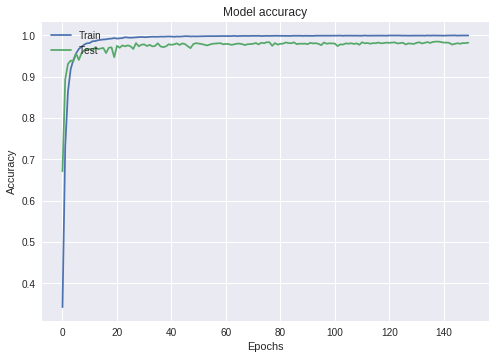

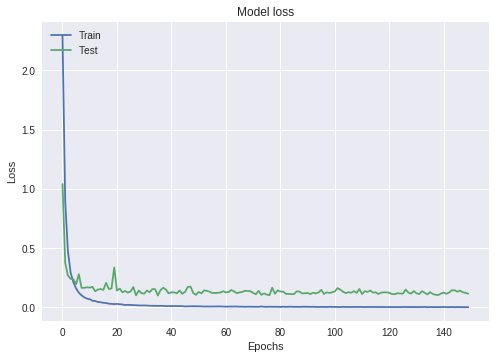

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# y_prob = model.predict(tnpimages)
# y_prob[1]

In [0]:
ypred=model.predict_classes(tnpimages)
tnplabels[10]

12

In [0]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(tnplabels, ypred)
print(cm)

[[ 60   0   0 ...   0   0   0]
 [  0 720   0 ...   0   0   0]
 [  0   3 747 ...   0   0   0]
 ...
 [  0   0   0 ...  85   0   0]
 [  0   0   0 ...   0  50   0]
 [  0   0   0 ...   0   0  90]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(tnplabels, ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       0.99      0.96      0.98       450
           4       1.00      0.99      1.00       660
           5       0.98      1.00      0.99       630
           6       0.99      0.95      0.97       150
           7       1.00      0.99      0.99       450
           8       0.98      0.97      0.97       450
           9       0.98      1.00      0.99       480
          10       0.99      0.99      0.99       660
          11       0.99      1.00      0.99       420
          12       1.00      0.98      0.99       690
          13       1.00      0.99      1.00       720
          14       0.97      1.00      0.99       270
          15       0.97      1.00      0.98       210
          16       0.97      1.00      0.98       150
          17       0.99    

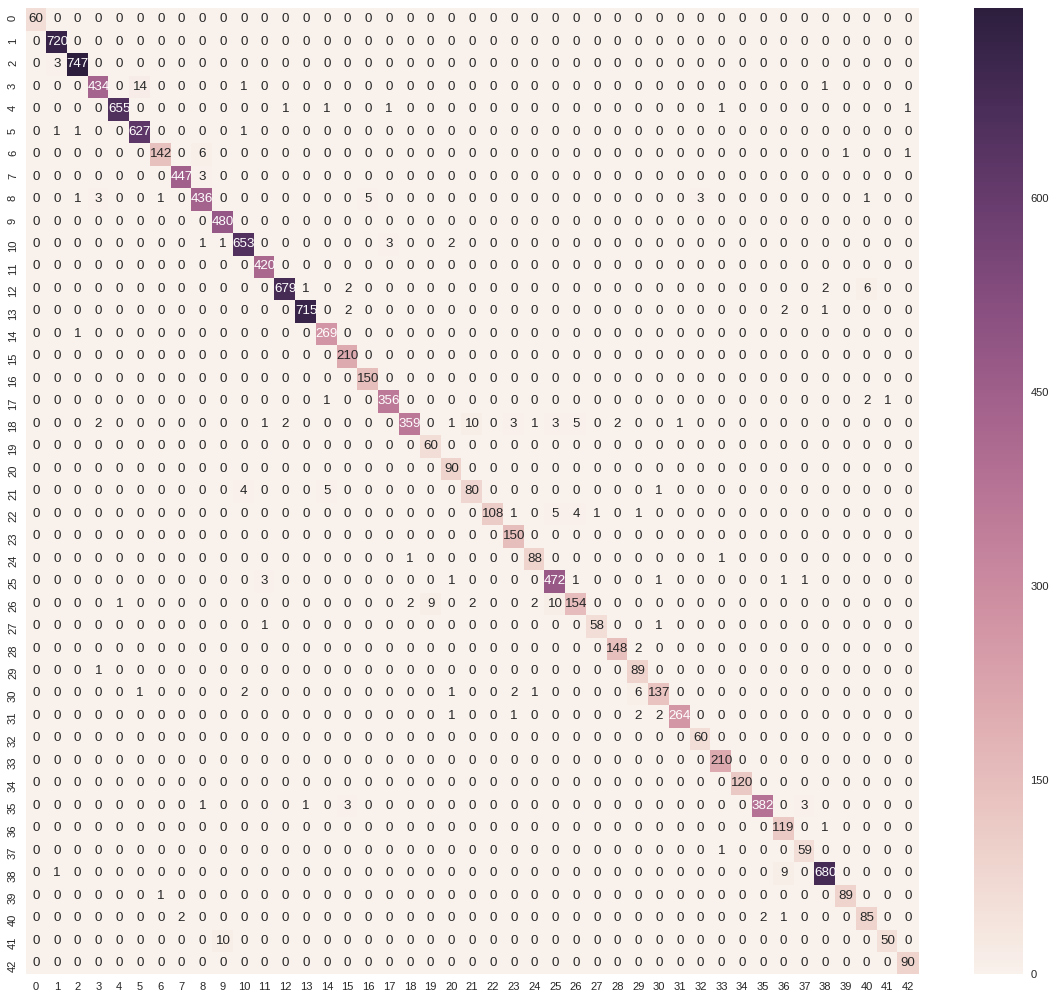

In [0]:
import seaborn as sns
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


sns.heatmap(confusion_matrix(tnplabels, ypred),annot=True,fmt="d") 


In [0]:
data1=tnpimages


98.18685668286878
90.46714172888066
82.6128265835044
76.52414885005211
71.60728423064981
67.67220903084755
64.23594616088052
61.01345999790201
57.980997618096076
55.86698338802335
53.776722094036714
51.282660347643294
50.229612040028904
48.09976247927544
46.37371338980593
44.81393506672301
43.2462391198295
41.58353128276547
40.475059376287724
39.31908155988344


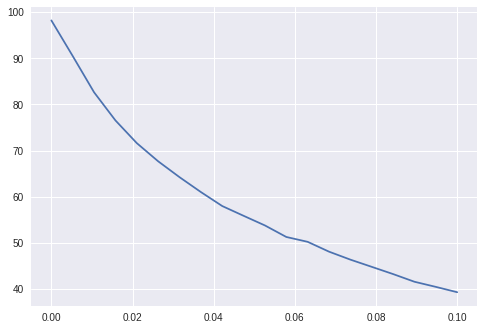

In [0]:
## gaussian noise evaluation

from skimage.util import random_noise
from skimage import transform
import matplotlib.pyplot as plt

import numpy as np
vara=np.linspace(0, 0.1, 20)
i=0
b=np.zeros((len(vara),1))
for a in vara:

  gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=a,seed=None, clip=True) for image in data1]
  gaussian_noise_imgs=np.array(gaussian_noise_imgs)
  
  gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
  score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
  b[i]=score[1]*100
  i+=1

  print(score[1]*100)
  
 
fig, ax = plt.subplots()
ax.plot(vara, b)

  
 

In [0]:

data2=tnpimages

In [0]:

sd1=[10, 10,10]
sd2=[20, 20,20]
sd3=[30, 30,30]
sd4=[40, 40,40]
sd5=[50, 50,50]
sd6=[6.3, 6.3, 6.3]
sd7=[12.75, 12.75, 12.75]
sd8=[19.21, 19.21, 19.21]
sdrange=[sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8]


nprn=np.zeros(3)

for sd in sdrange:
  i=0
  for values in sd:
      nsd=values/255
      varsd=nsd*nsd
      gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=varsd,seed=None, clip=True) for image in data2]
      gaussian_noise_imgs=np.array(gaussian_noise_imgs)
      
      gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
      score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
      print('Accuracy is:', score[1], 'for sd', values)  
      nprn[i]=score[1]
      i+=1

      

  avgsd=nprn
  print(' accuracy average is :', sum(avgsd) / len(avgsd))


Accuracy is: 0.9652414884061353 for sd 10
Accuracy is: 0.9648456056252039 for sd 10
Accuracy is: 0.9634996040039183 for sd 10
 accuracy average is : 0.9645288993450859
Accuracy is: 0.8897862232307169 for sd 20
Accuracy is: 0.8881235154677457 for sd 20
Accuracy is: 0.8877276324980427 for sd 20
 accuracy average is : 0.8885457903988351
Accuracy is: 0.7869358670777588 for sd 30
Accuracy is: 0.7872525732571987 for sd 30
Accuracy is: 0.7825019795084792 for sd 30
 accuracy average is : 0.7855634732811455
Accuracy is: 0.6919239904704966 for sd 40
Accuracy is: 0.691607284328811 for sd 40
Accuracy is: 0.690023753016314 for sd 40
 accuracy average is : 0.6911850092718739
Accuracy is: 0.6034837687761181 for sd 50
Accuracy is: 0.6062549483936548 for sd 50
Accuracy is: 0.6044338877580512 for sd 50
 accuracy average is : 0.604724201642608
Accuracy is: 0.9749010291820656 for sd 6.3
Accuracy is: 0.9772763260941796 for sd 6.3
Accuracy is: 0.9760886776381226 for sd 6.3
 accuracy average is : 0.976088677

psnr of original image and true image : 14.135839176996491
float64
float64


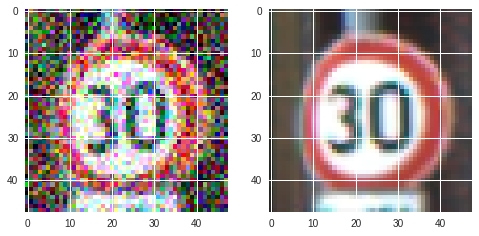

In [0]:
  #psnr calculatioon
  
  import skimage
  import numpy as np
  from skimage import img_as_float
  b=1
  
  a = random_noise(tnpimages[b], mode='gaussian',mean=0,var=0.05,seed=None, clip=True) 
  plt.subplot(1, 2,1)
  plt.imshow(a)
  plt.subplot(1, 2,2)
  c=tnpimages[b]
  plt.imshow(c)
  imtrue=img_as_float	(c)
  imtest=a
  print('psnr of original image and true image :',skimage.measure.compare_psnr(imtrue, imtest, data_range=None))
  
  print(imtrue.dtype)
  print(imtest.dtype)

In [0]:

model.save('/content/gdrive/My Drive/python-cloud/New/keras4_gru_adadelta_pooldrop.h5')